# **ADWIN notebook - left for future works**

In [1]:
from river.datasets import synth
from river.drift import ADWIN
from river import evaluate, metrics, ensemble, drift, tree

import matplotlib.pyplot as plt

In [2]:
stream_SEA = synth.ConceptDriftStream(
    stream=synth.SEA(seed=42, variant=0),
    drift_stream=synth.SEA(seed=42, variant=3),
    position=500,
    width=10,
    seed=1
)

In [4]:
stream_Hyperplane = synth.Hyperplane(
    n_features=2,
    noise_percentage=0.0,
    mag_change=0.01,
    seed=42
)

In [3]:
n = 1000
X, y = [], []

for x, label in stream_SEA.take(n):
    X.append([x[i] for i in x.keys()])
    y.append(label)

Drift detected at sample 511


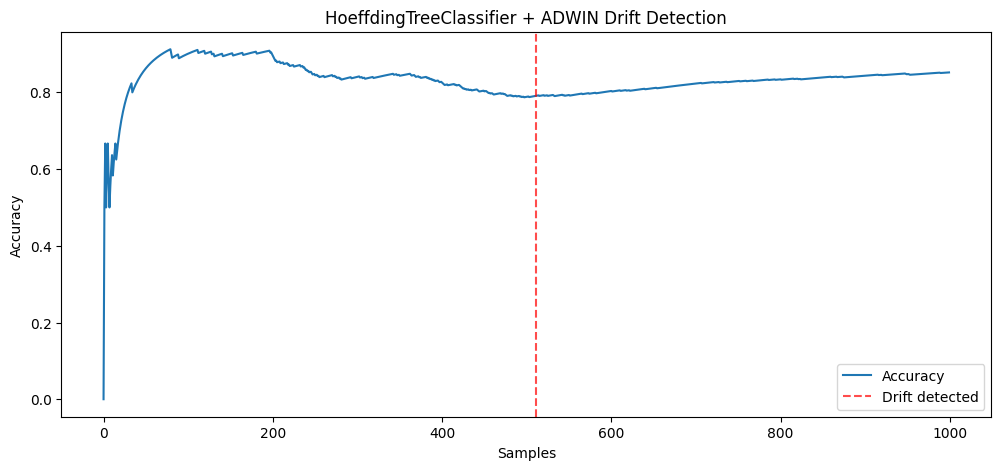

In [5]:
adwin = ADWIN()
model = tree.HoeffdingTreeClassifier()
metric = metrics.Accuracy()

accuracies = []
drift_points = []

for i, (x, y) in enumerate(stream_Hyperplane.take(n)):
    y_pred = model.predict_one(x)
    model.learn_one(x, y)

    metric.update(y, y_pred)
    accuracies.append(metric.get())

    error = int(y_pred is not None and y != y_pred)
    adwin.update(error)

    if adwin.drift_detected:
        drift_points.append(i)
        print(f"Drift detected at sample {i}")

# 6. Plot results
plt.figure(figsize=(12,5))
plt.plot(accuracies, label="Accuracy")
for dp in drift_points:
    plt.axvline(dp, color="red", linestyle="--", alpha=0.7, label="Drift detected" if dp == drift_points[0] else "")
plt.xlabel("Samples")
plt.ylabel("Accuracy")
plt.title("HoeffdingTreeClassifier + ADWIN Drift Detection")
plt.legend()
plt.show()